In [1]:
import numpy as np 
import plotting_utils as pl
import statistics_utils as stats

In [2]:
general_directory = "/hpcwork/zu992399/look_elsewhere_paper/"
signal_randomized = True
signals = np.array([0, 50, 100, 150,200, 250,300,400,500,600,700,800,900,1000])#, 2500, 3000])
signals_plot = np.array([0, 200, 400, 600, 800, 1000])

# SIC for Signals

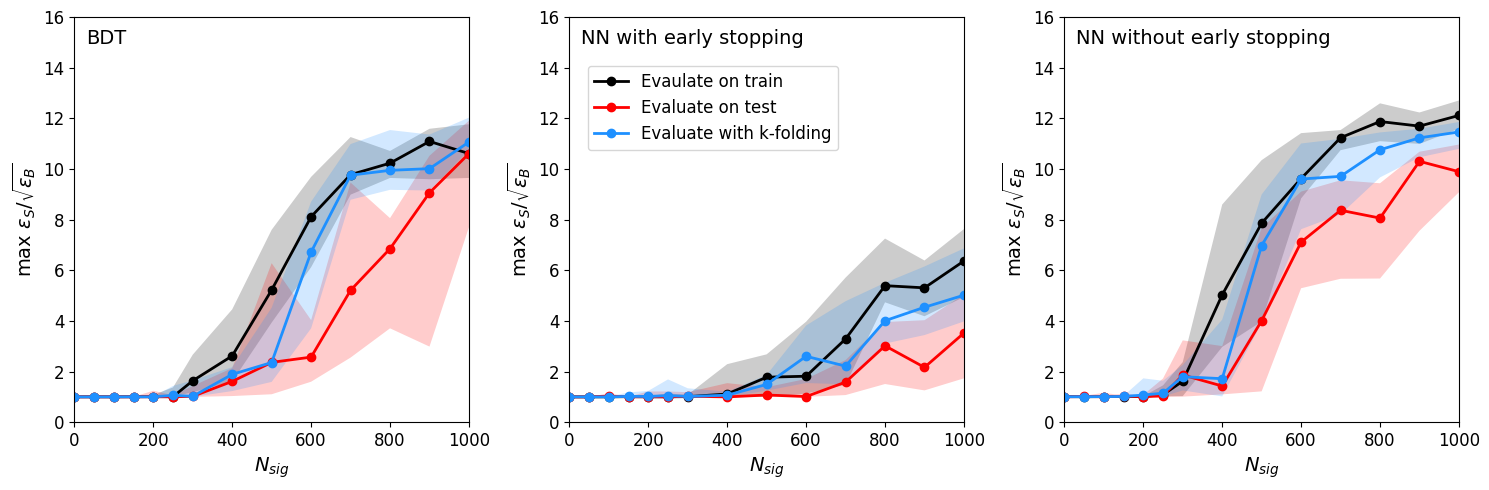

In [3]:
pl.sics_plotting(general_directory, signals_plot, signals, signal_randomized=signal_randomized)

# NN with early stopping

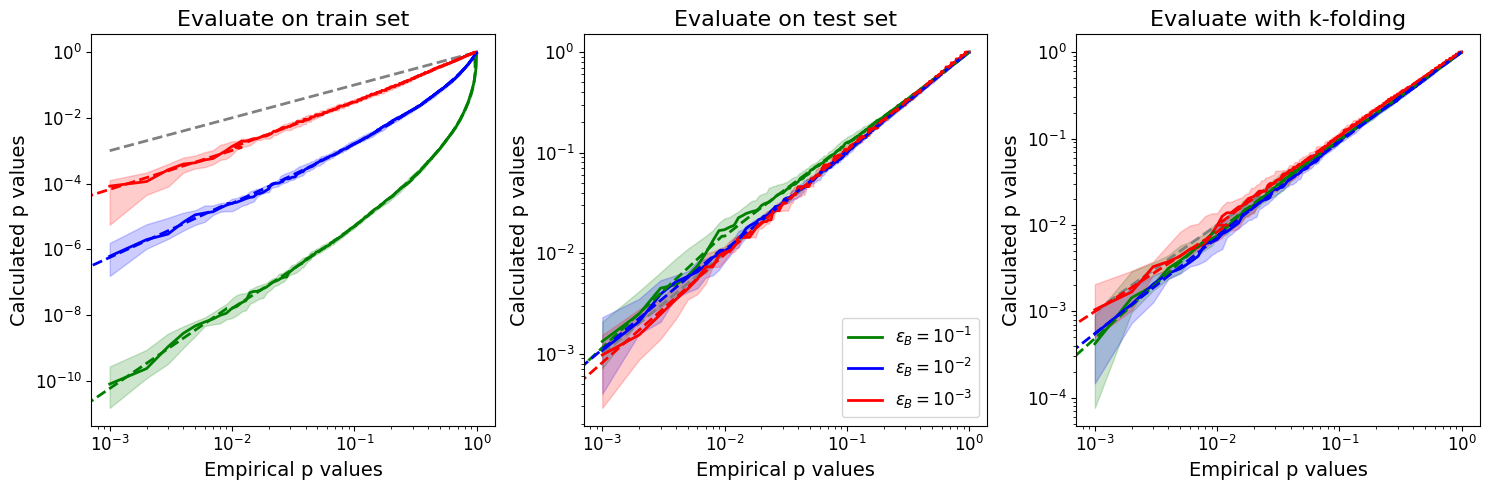

In [13]:
direc = general_directory+"LHCO_NN/"
p_train = np.load(direc+"evaluate_on_train.npy")
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = np.sort(np.load(direc+"kfolds.npy"))
p_train_split = pl.prep_pvalues(p_train, 10, True)
p_test_split = pl.prep_pvalues(p_test, 10, True)
p_kfolds_split = pl.prep_pvalues(p_kfolds, 10, True)

NN_fits = pl.plot_trials_factor_split(p_train_split, p_test_split, p_kfolds_split, "NN")

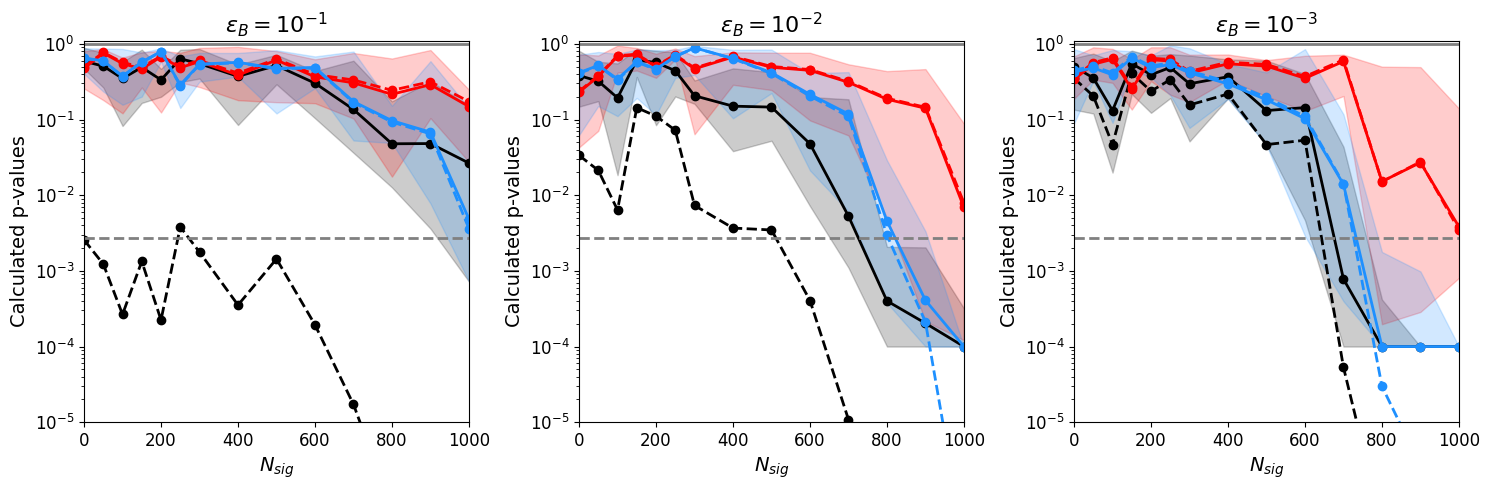

In [14]:
p_signals_train = np.zeros((len(signals),10,3))
p_signals_test = np.zeros((len(signals),10,3))
p_signals_kfolds = np.zeros((len(signals),10,3))
p_signals_train_corrected = np.zeros((len(signals),10,3))
p_signals_test_corrected = np.zeros((len(signals),10,3))
p_signals_kfolds_corrected = np.zeros((len(signals),10,3))
signals = np.array([0, 50, 100, 150,200, 250,300,400,500,600,700,800,900,1000])
if signal_randomized:
    folder = general_directory+"LHCO_NN/randsignal/"
else: 
    folder = general_directory+"LHCO_NN/"
for i,s in enumerate(signals):
    p_signals_train[i] = stats.make_pvalues_traintest(folder+"train/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_test[i] = stats.make_pvalues_traintest(folder+"test/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_kfolds[i] = stats.make_pvalues_kfolds(folder+"kfolds/Nsig_"+str(s)+"/test")[:,:3]

for i,s in enumerate(signals):
    for j in range(3):
        for k in range(10):
            #print(i,j,k)
            p_signals_train_corrected[i,k,j] = NN_fits["train"].predict(p_signals_train[i,k,j], j)
            p_signals_test_corrected[i,k,j] = NN_fits["test"].predict(p_signals_test[i,k,j], j)
            p_signals_kfolds_corrected[i,k,j] = NN_fits["kfolds"].predict(p_signals_kfolds[i,k,j], j)

p_uncorr = {"train": p_signals_train, "test": p_signals_test, "kfolds": p_signals_kfolds}
p_corr = {"train": p_signals_train_corrected, "test": p_signals_test_corrected, "kfolds": p_signals_kfolds_corrected}

pl.signal_pvalues_corr_uncorr(p_corr, p_uncorr, signals_plot, signals, "NN")


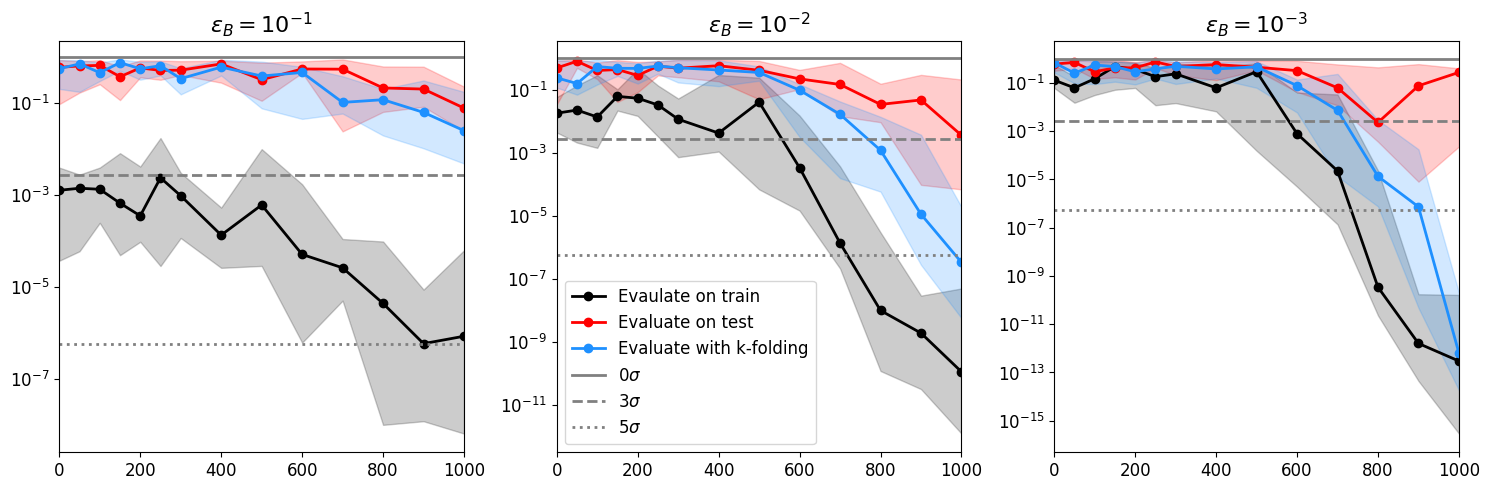

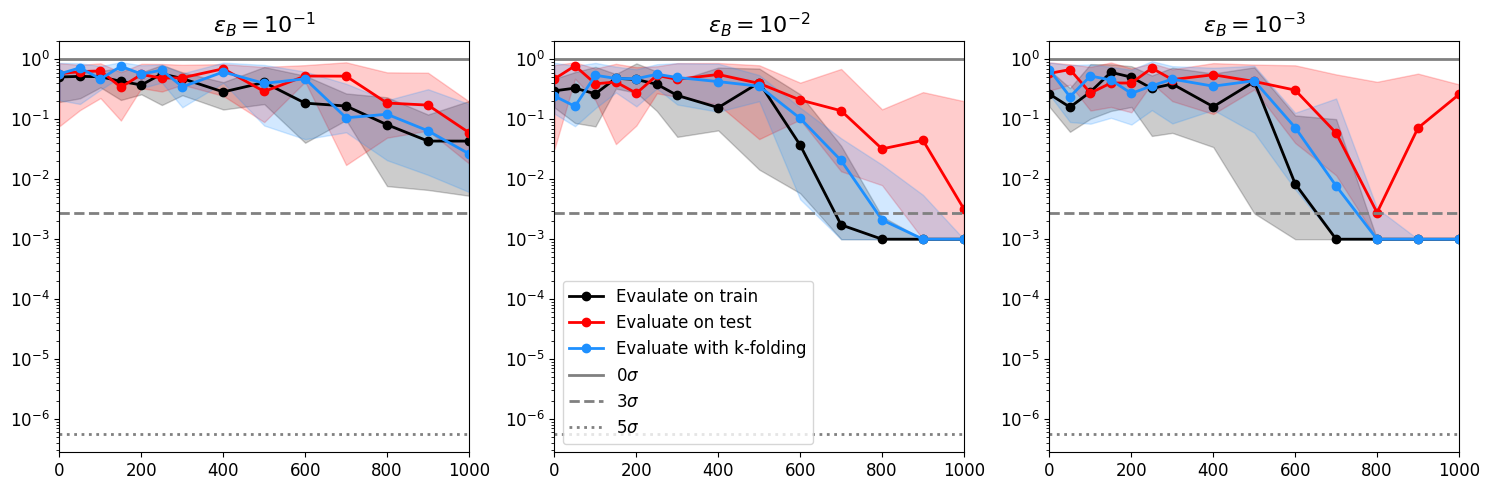

In [5]:
pl.signal_pvalues(p_signals_train, p_signals_test, p_signals_kfolds, signals_plot, signals, "uncorrected_NN")
pl.signal_pvalues(p_signals_train_corrected, p_signals_test_corrected, p_signals_kfolds_corrected, signals_plot, signals, "corrected_NN")

# NN without early stopping

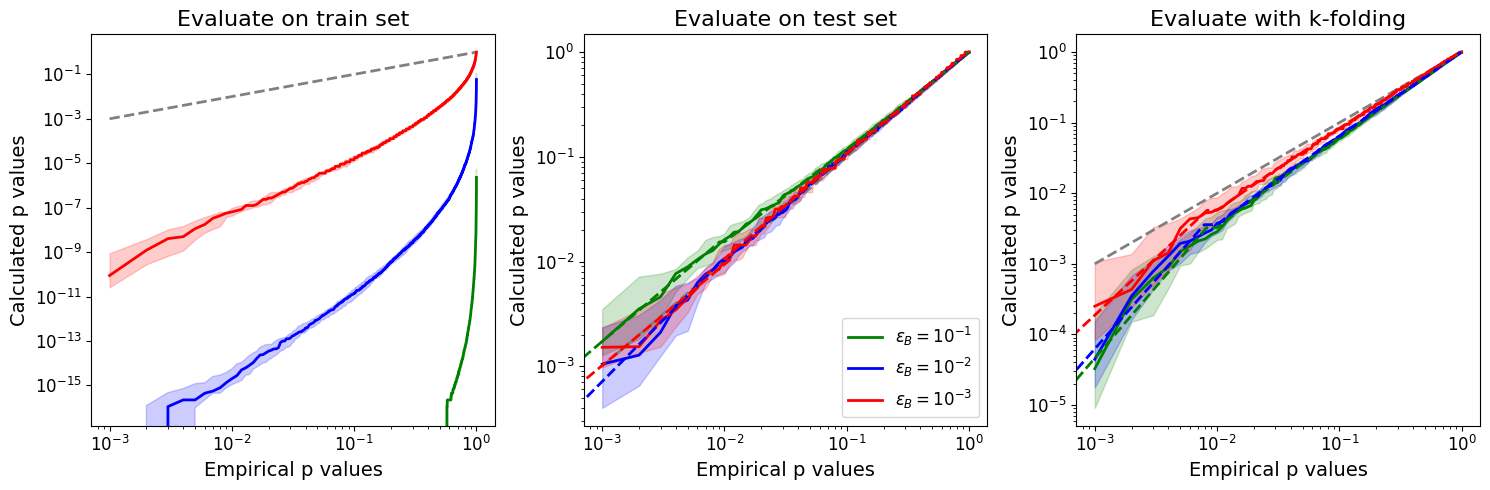

In [11]:
direc = general_directory+"LHCO_NN_noearlystopping/"
p_train = np.load(direc+"evaluate_on_train.npy")
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = np.sort(np.load(direc+"kfolds.npy"))
p_train_split = pl.prep_pvalues(p_train, 10, True)
p_test_split = pl.prep_pvalues(p_test, 10, True)
p_kfolds_split = pl.prep_pvalues(p_kfolds, 10, True)

NN_fits = pl.plot_trials_factor_split(p_train_split, p_test_split, p_kfolds_split, "NN_noearlystopping", ignore_train=True)

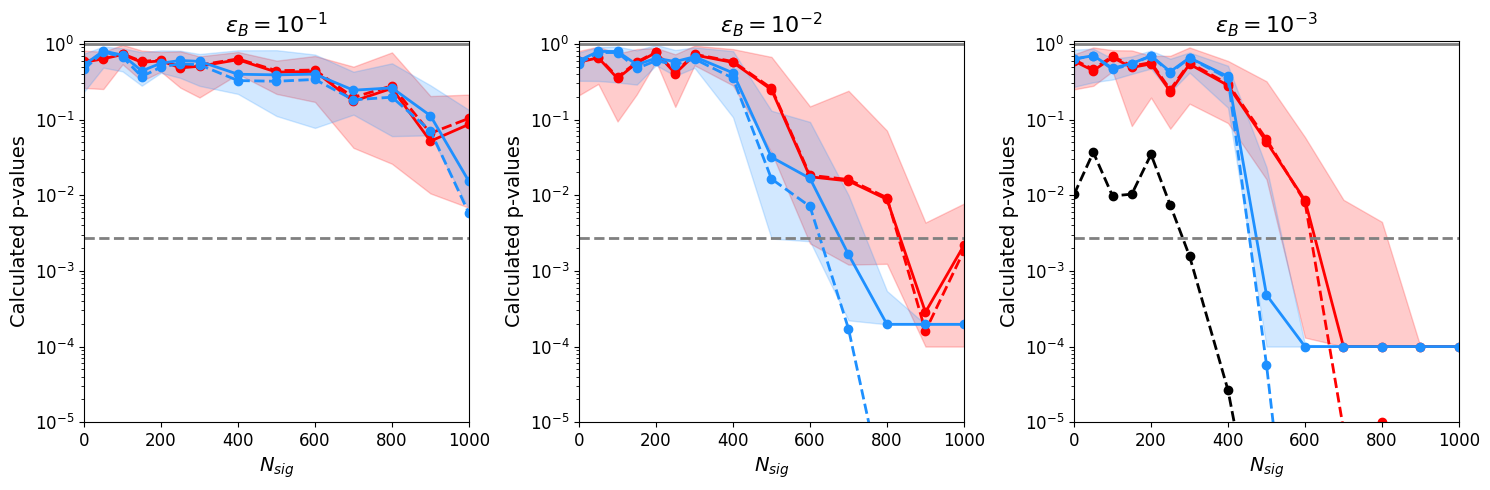

In [12]:
p_signals_train = np.zeros((len(signals),10,3))
p_signals_test = np.zeros((len(signals),10,3))
p_signals_kfolds = np.zeros((len(signals),10,3))
p_signals_train_corrected = np.zeros((len(signals),10,3), dtype=None)
p_signals_test_corrected = np.zeros((len(signals),10,3))
p_signals_kfolds_corrected = np.zeros((len(signals),10,3))
if signal_randomized:
    folder = general_directory+"LHCO_NN_noearlystopping/randsignal/"
else: 
    folder = general_directory+"LHCO_NN_noearlystopping/"
for i,s in enumerate(signals):
    p_signals_train[i] = stats.make_pvalues_traintest(folder+"train/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_test[i] = stats.make_pvalues_traintest(folder+"test/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_kfolds[i] = stats.make_pvalues_kfolds(folder+"kfolds/Nsig_"+str(s)+"/test")[:,:3]

for i,s in enumerate(signals):
    for j in range(3):
        for k in range(10):
            p_signals_test_corrected[i,k,j] = NN_fits["test"].predict(p_signals_test[i,k,j], j)
            p_signals_kfolds_corrected[i,k,j] = NN_fits["kfolds"].predict(p_signals_kfolds[i,k,j], j)


p_uncorr = {"train": p_signals_train, "test": p_signals_test, "kfolds": p_signals_kfolds}
p_corr = {"train": p_signals_train_corrected, "test": p_signals_test_corrected, "kfolds": p_signals_kfolds_corrected}

pl.signal_pvalues_corr_uncorr(p_corr, p_uncorr, signals_plot, signals, "NN_noearlystopping")

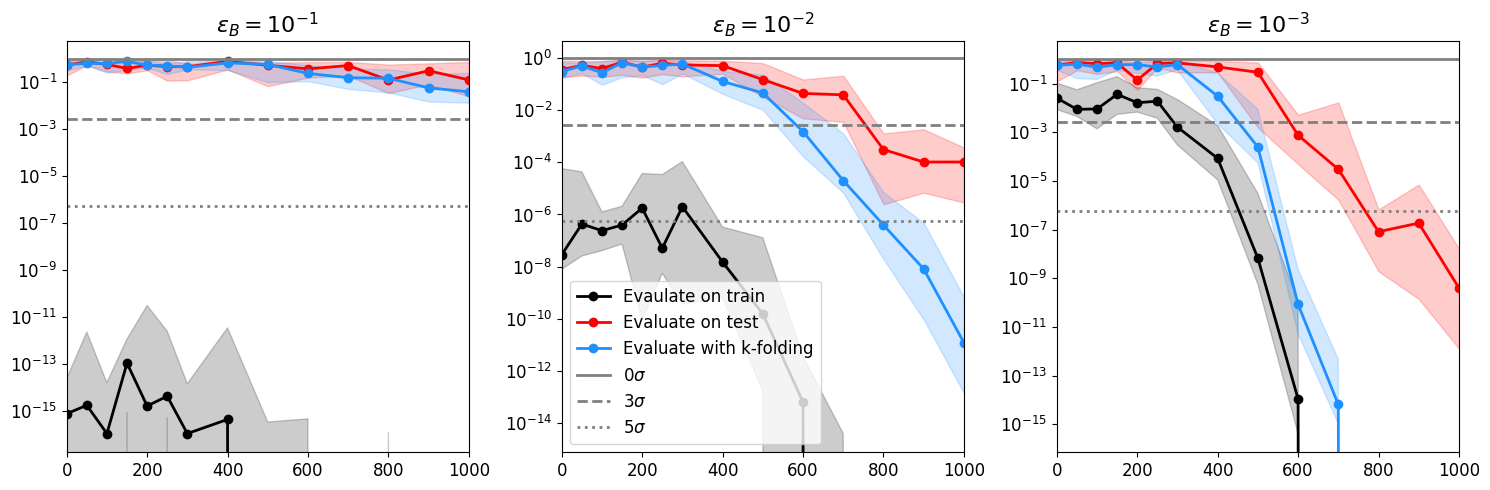

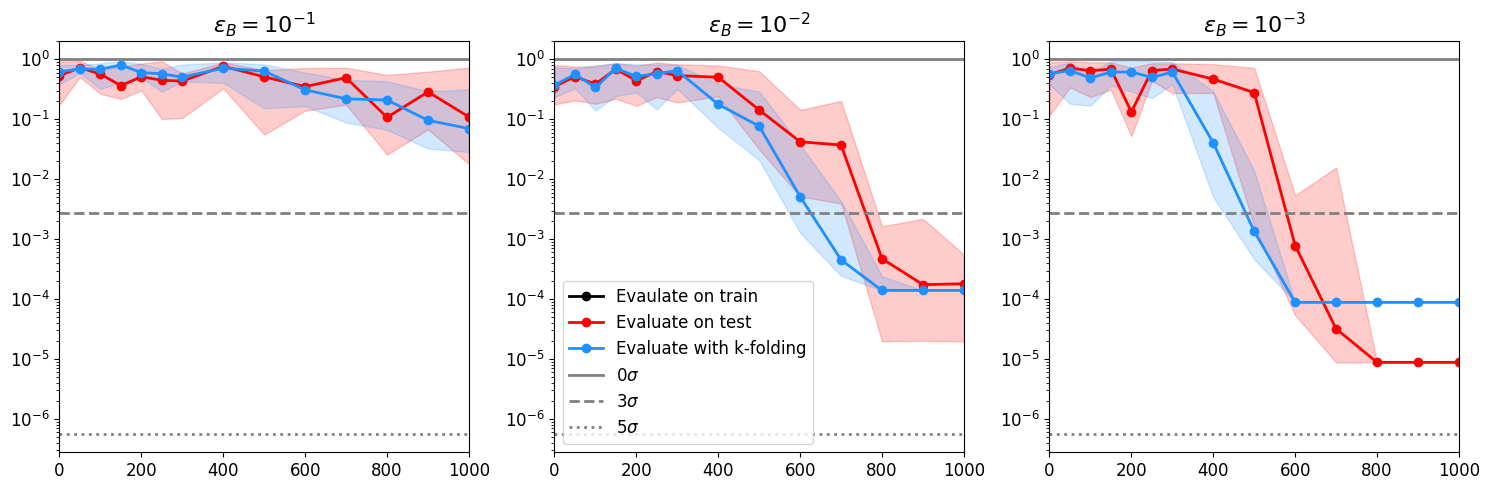

In [9]:
pl.signal_pvalues(p_signals_train, p_signals_test, p_signals_kfolds, signals_plot, signals, "uncorrected_NN_noearlystopping")
pl.signal_pvalues(p_signals_train_corrected, p_signals_test_corrected, p_signals_kfolds_corrected, signals_plot, signals, "corrected_NN_noearlystopping")

# BDT

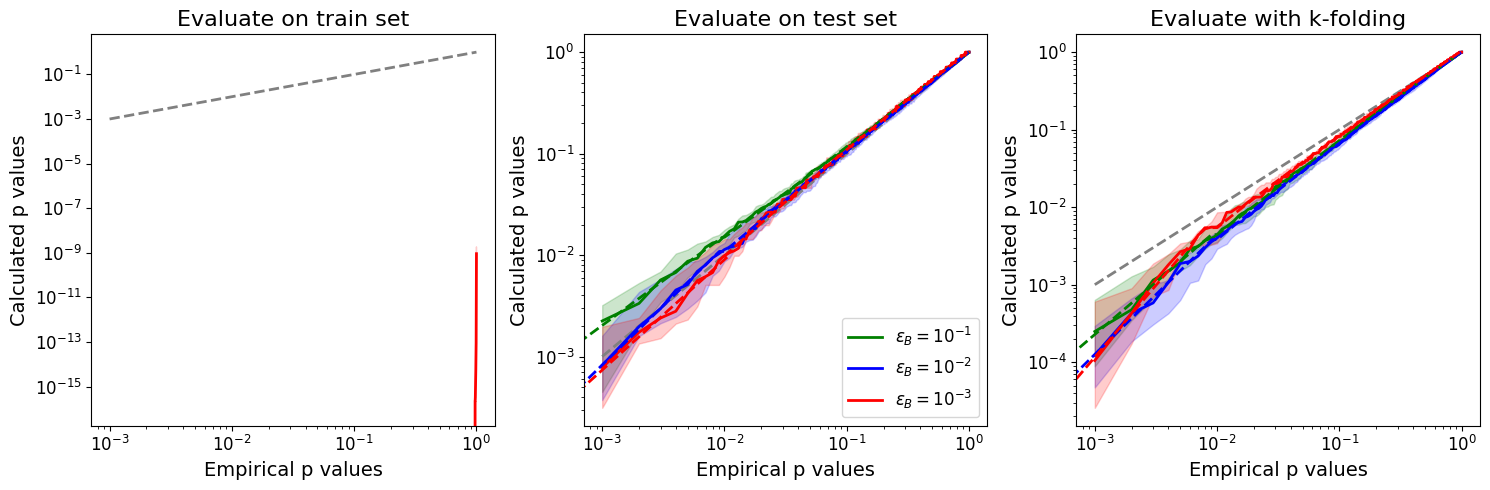

In [6]:
direc = general_directory+"LHCO_BDT/"
p_train = np.load(direc+"evaluate_on_train.npy")
p_test = np.sort(np.load(direc+"evaluate_on_test_half.npy"))
p_kfolds = np.sort(np.load(direc+"kfolds.npy"))
p_train_split = pl.prep_pvalues(p_train, 10, True)
p_test_split = pl.prep_pvalues(p_test, 10, True)
p_kfolds_split = pl.prep_pvalues(p_kfolds, 10, True)

NN_fits = pl.plot_trials_factor_split(p_train_split, p_test_split, p_kfolds_split, "BDT", ignore_train=True)

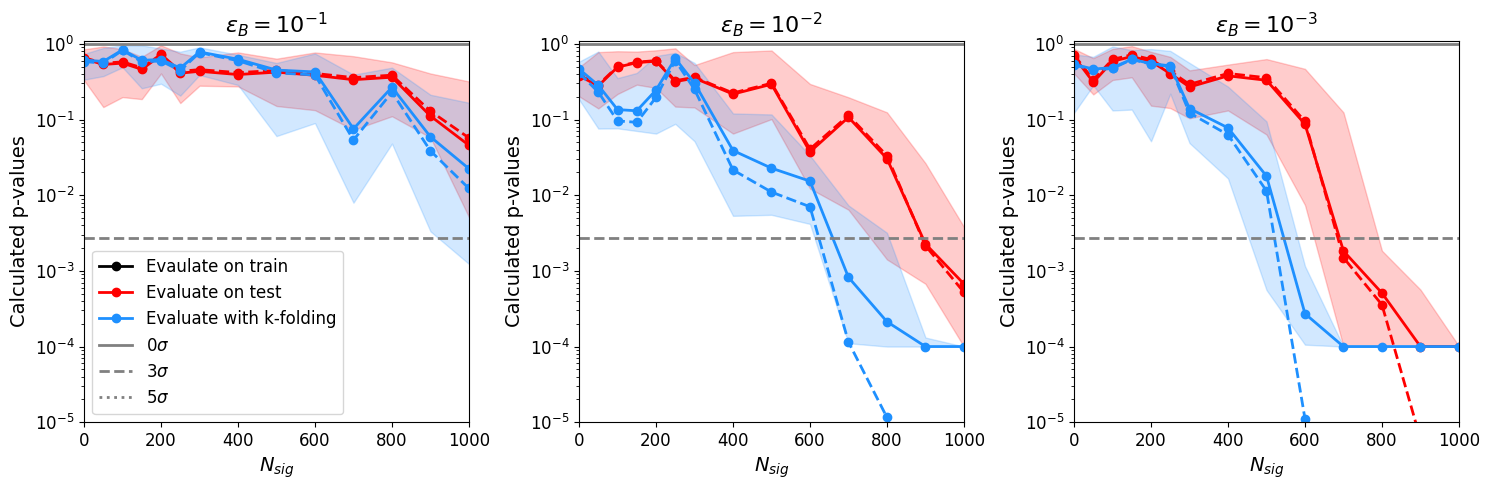

In [7]:
p_signals_train = np.zeros((len(signals),10,3))
p_signals_test = np.zeros((len(signals),10,3))
p_signals_kfolds = np.zeros((len(signals),10,3))
p_signals_train_corrected = np.zeros((len(signals),10,3), dtype=None)
p_signals_test_corrected = np.zeros((len(signals),10,3))
p_signals_kfolds_corrected = np.zeros((len(signals),10,3))
if signal_randomized:
    folder = general_directory+"LHCO_BDT/randsignal/"
else: 
    folder = general_directory+"LHCO_BDT/"
for i,s in enumerate(signals):
    p_signals_train[i] = stats.make_pvalues_traintest(folder+"train/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_test[i] = stats.make_pvalues_traintest(folder+"test/Nsig_"+str(s)+"/test")[:,:3]
    p_signals_kfolds[i] = stats.make_pvalues_kfolds(folder+"kfolds/Nsig_"+str(s)+"/test")[:,:3]

for i,s in enumerate(signals):
    for j in range(3):
        for k in range(10):
            p_signals_test_corrected[i,k,j] = NN_fits["test"].predict(p_signals_test[i,k,j], j)
            p_signals_kfolds_corrected[i,k,j] = NN_fits["kfolds"].predict(p_signals_kfolds[i,k,j], j)



p_uncorr = {"train": p_signals_train, "test": p_signals_test, "kfolds": p_signals_kfolds}
p_corr = {"train": p_signals_train_corrected, "test": p_signals_test_corrected, "kfolds": p_signals_kfolds_corrected}

pl.signal_pvalues_corr_uncorr(p_corr, p_uncorr, signals_plot, signals, "BDT", legend=True)

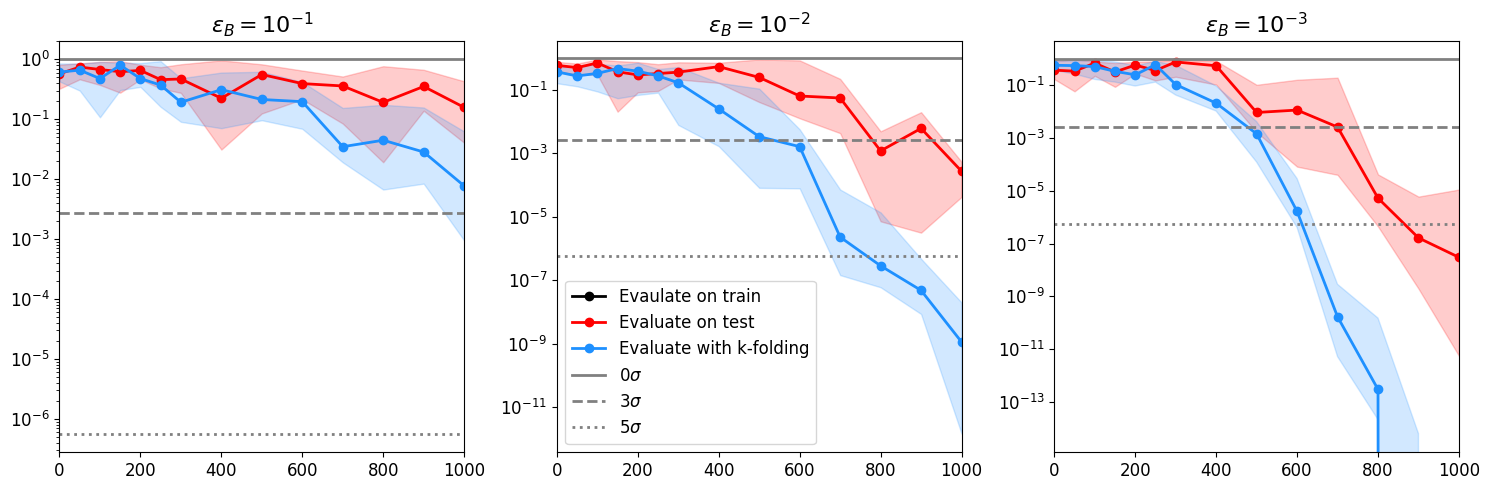

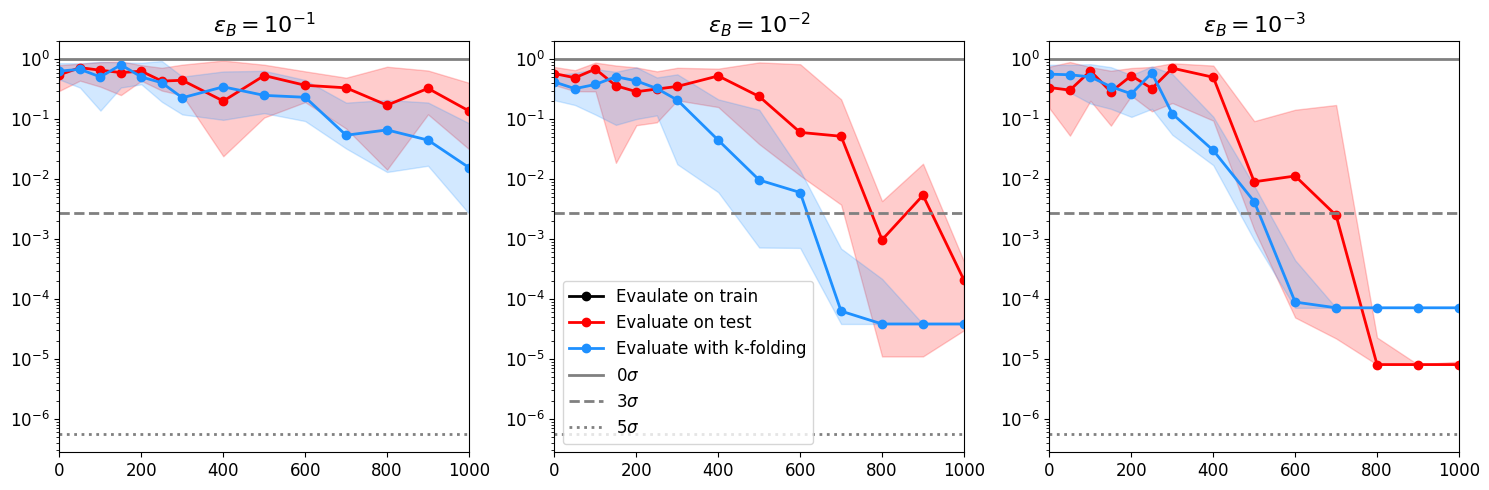

In [12]:
pl.signal_pvalues(p_signals_train, p_signals_test, p_signals_kfolds, signals_plot, signals, "uncorrected_BDT")
pl.signal_pvalues(p_signals_train_corrected, p_signals_test_corrected, p_signals_kfolds_corrected, signals_plot, signals, "corrected_BDT")